In [1]:
import matplotlib.pyplot as plt
import torch

import train

/home/xbuban1/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0")

In [3]:
image_size = 448
vit_classifier, vit_processor = train.load_simple_classifier(image_size, device)

train_loader, val_loader = train.load_data(
    processor=None,
    image_size=image_size,
    max_image_stack_size=1,
    minibatch_size=128,
    data_split=0.8,
    device=device,
    seed=42
)

In [4]:
def get_hist(loader):
    hist = torch.zeros(17)
    for _, labels in loader:
        for label in labels:
                hist[label] += 1
    return hist

In [5]:
train_hist = get_hist(train_loader)
val_hist = get_hist(val_loader)

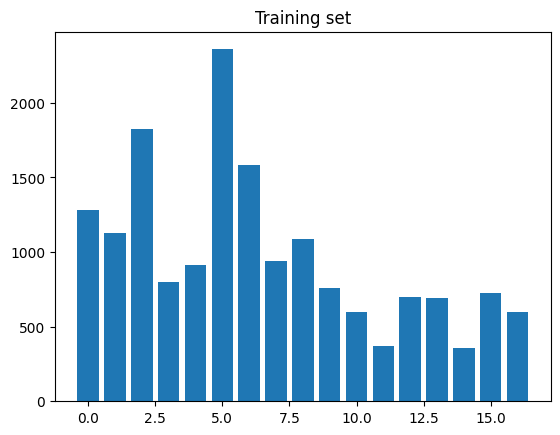

In [6]:
plt.figure()
plt.bar(range(17), train_hist)
plt.title("Training set")
plt.show()

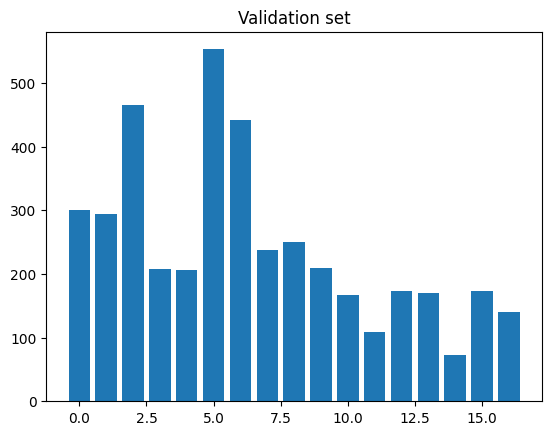

In [7]:
plt.figure()
plt.bar(range(17), val_hist)
plt.title("Validation set")
plt.show()

In [8]:
train_hist / val_hist / 4

tensor([1.0615, 0.9551, 0.9817, 0.9639, 1.1044, 1.0660, 0.8965, 0.9926, 1.0797,
        0.9024, 0.8922, 0.8440, 1.0087, 1.0132, 1.2158, 1.0462, 1.0656])